In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np

In [2]:
# Load your cleaned dataset
df = pd.read_csv('cleaned_news_data.csv', parse_dates=['date'])

# Basic info about the dataset
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584295 entries, 0 to 1584294
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   date         1584295 non-null  datetime64[ns]
 1   title        1584295 non-null  object        
 2   article      1584123 non-null  object        
 3   publication  1584295 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 48.3+ MB
None
                                 date                      title  \
count                         1584295                    1584295   
unique                            NaN                    1541893   
top                               NaN  The VICE Morning Bulletin   
freq                              NaN                        556   
mean    2018-04-15 16:10:38.618742016                        NaN   
min               2016-01-01 00:00:00                        NaN   
25%               2017-02-12 16:06:43    

Missing Values (%):
date           0.000000
title          0.000000
article        0.010857
publication    0.000000
dtype: float64


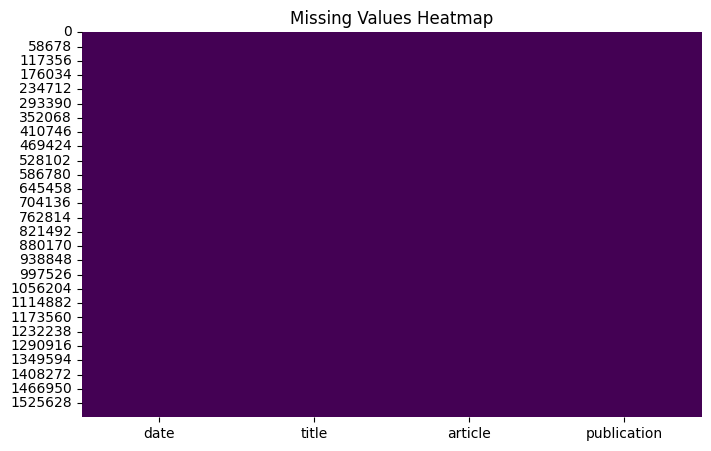

In [3]:
# Percentage of missing values
missing_values = df.isnull().mean() * 100
print("Missing Values (%):")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

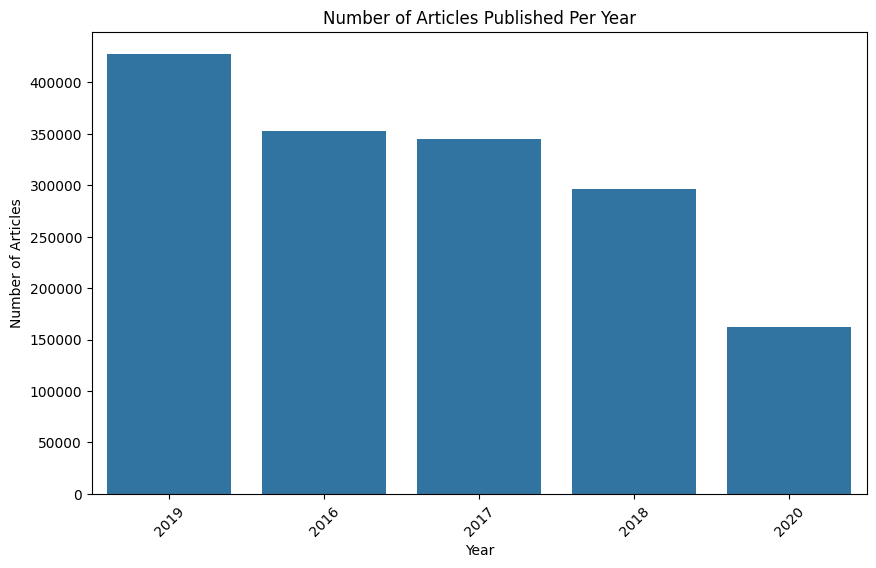

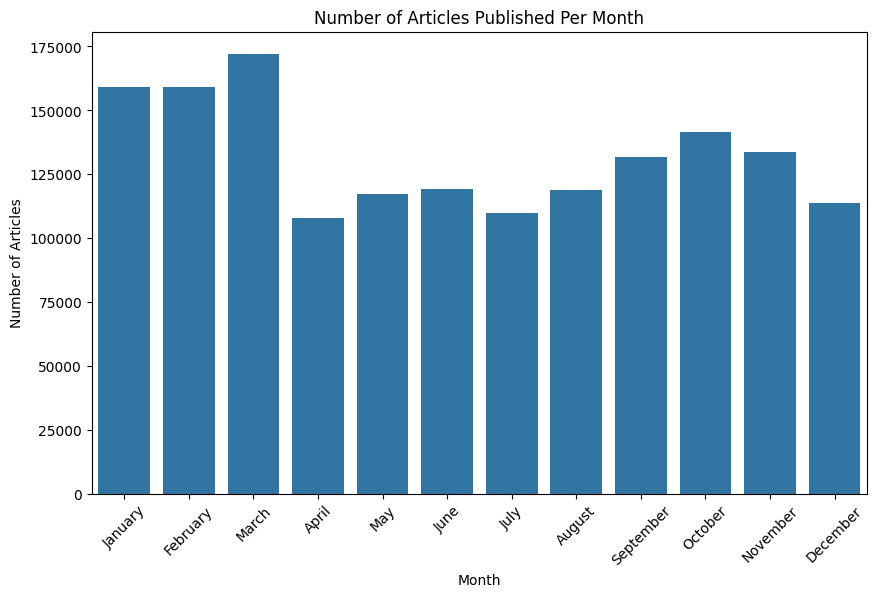

In [5]:
# Plot articles by year
df['year'] = df['date'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df, order=df['year'].value_counts().index)
plt.title("Number of Articles Published Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

# Articles by month
df['month'] = df['date'].dt.month_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df, order=pd.date_range("2023-01-01", "2023-12-01", freq="MS").strftime("%B"))
plt.title("Number of Articles Published Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

C:\Users\Sruthi Srikanth\AppData\Local\Temp\ipykernel_14368\19778406.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publications.values, y=top_publications.index, palette="muted")


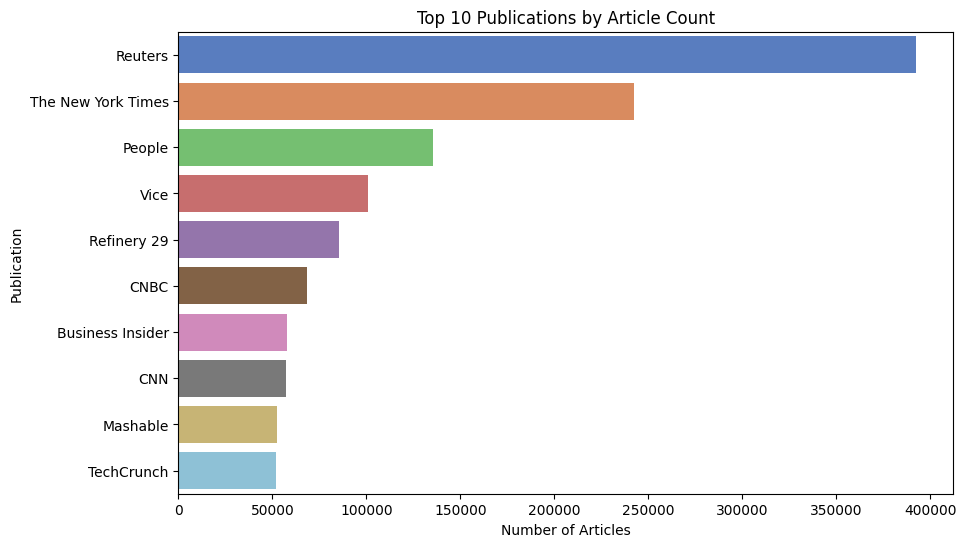

In [6]:
# Most frequent publications
top_publications = df['publication'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publications.values, y=top_publications.index, palette="muted")
plt.title("Top 10 Publications by Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Publication")
plt.show()

In [8]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 4.2 MB/s eta 0:00:03
   -------------------- ------------------- 5.5/11.0 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 20.2 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 2.1/44.5 MB 39.0 MB/s eta 0:00:02
   -- ------------------------------------- 3.1/44.5 MB 7.4 MB/s eta 0:00:06
   ------- -------------------------------- 8.1/44.5 MB 12.9 MB/s eta 0:00:03
   ---------- ----------------------------- 11.8/44.5 MB 14.2 MB/s eta 0:00:03
   ------------ --------------------------- 14.4/44.5 MB 13.7 MB/s eta 0:00:03
   --------------- ------------------------ 16.8/44

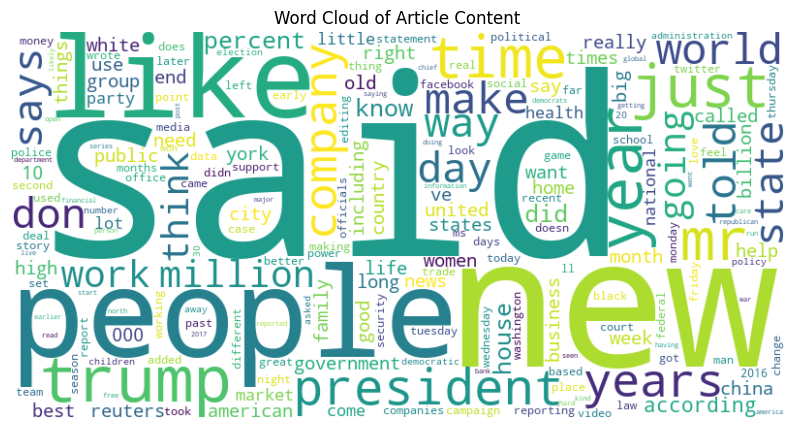

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use CountVectorizer for word frequency
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
word_matrix = vectorizer.fit_transform(df['article'].dropna())

# Calculate word frequencies
word_counts = word_matrix.sum(axis=0)
word_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Generate a word cloud from the most frequent words
top_words_dict = dict(word_freq[:500])  # Top 500 words for the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Article Content")
plt.show()

C:\Users\Sruthi Srikanth\AppData\Local\Temp\ipykernel_14368\3166034435.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_word_count.values, y=avg_word_count.index, palette="coolwarm")


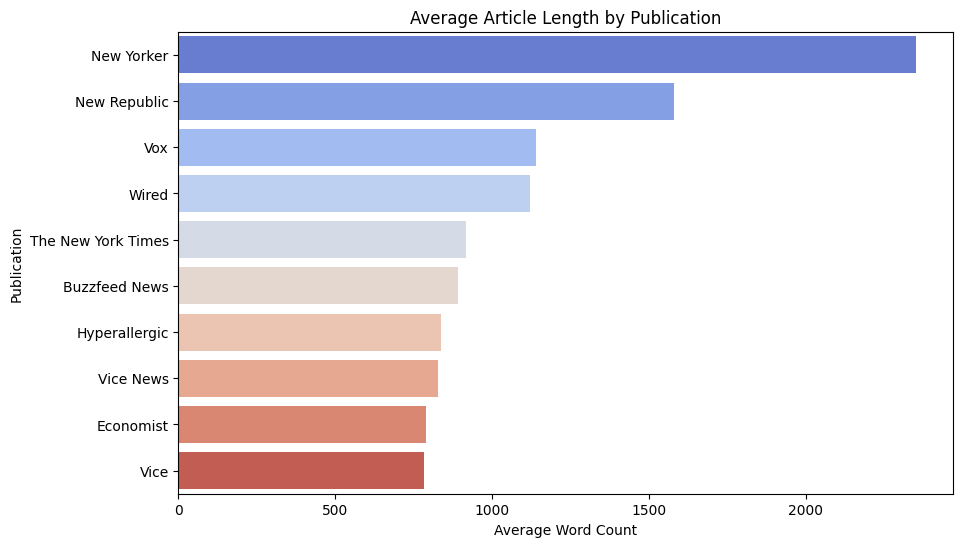

In [8]:
import seaborn as sns

# Calculate word counts for each article
df['word_count'] = df['article'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Compute average word count by publication
avg_word_count = df.groupby('publication')['word_count'].mean().sort_values(ascending=False).head(10)

# Plot average word count by publication
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_word_count.values, y=avg_word_count.index, palette="coolwarm")
plt.title("Average Article Length by Publication")
plt.xlabel("Average Word Count")
plt.ylabel("Publication")
plt.show()

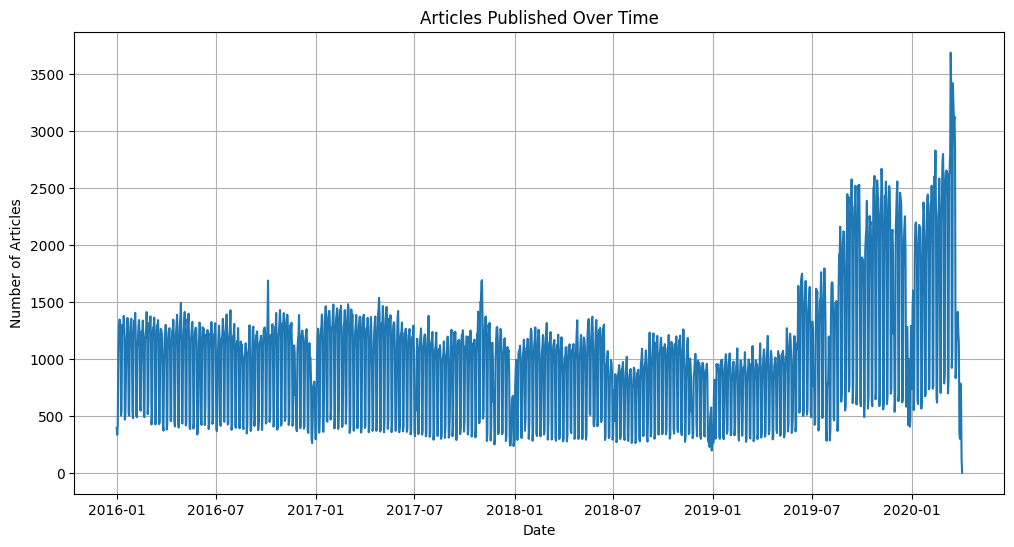

In [9]:
# Group articles by date
articles_per_day = df.groupby(df['date'].dt.date).size()

# Plot articles published per day
plt.figure(figsize=(12, 6))
articles_per_day.plot()
plt.title("Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

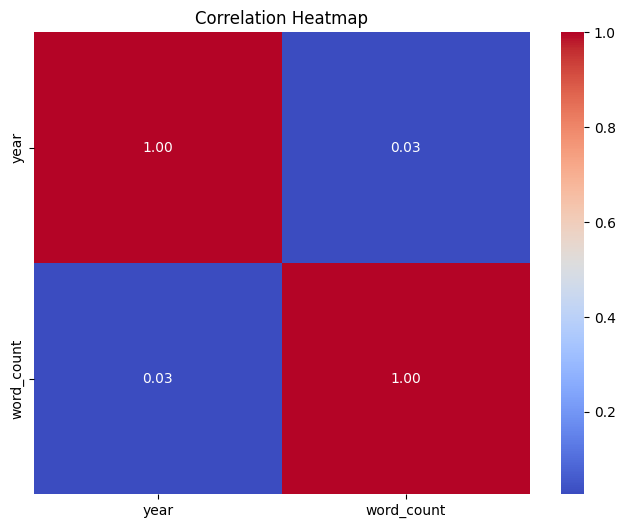

In [10]:
import seaborn as sns

# Select numerical columns for correlation
numerical_columns = df.select_dtypes(include=['float', 'int'])

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()